In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': '2019',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            52, 2, 49,
            7,
        ],
    },
    'download.nc')

2024-04-08 11:41:29,738 INFO Welcome to the CDS
2024-04-08 11:41:29,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-08 11:41:29,839 INFO Request is queued
2024-04-08 11:41:38,095 INFO Request is running
2024-04-08 11:57:48,785 INFO Request is completed
2024-04-08 11:57:48,785 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/adaptor.mars.internal-1712570202.196429-7170-9-506f6dc9-71c2-449b-b042-07f05039cc30.nc to download.nc (4.6M)
2024-04-08 11:57:49,527 INFO Download rate 6.2M/s   


Result(content_length=4819204,content_type=application/x-netcdf,location=https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/adaptor.mars.internal-1712570202.196429-7170-9-506f6dc9-71c2-449b-b042-07f05039cc30.nc)

In [1]:
import netCDF4 as nc
fn = 'download.nc'
dl = nc.Dataset(fn)
print(dl)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-04-08 09:57:16 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data3/adaptor.mars.internal-1712570202.196429-7170-9-506f6dc9-71c2-449b-b042-07f05039cc30.nc /cache/tmp/506f6dc9-71c2-449b-b042-07f05039cc30-adaptor.mars.internal-1712569296.149821-7170-11-tmp.grib
    dimensions(sizes): longitude(21), latitude(13), time(8760)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 tp(time, latitude, longitude)
    groups: 


In [2]:
for dim in dl.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 21
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 13
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 8760


In [3]:
dl["tp"][0]

masked_array(
  data=[[8.60537795e-06, 9.54074512e-06, 1.14114795e-05, 4.67683585e-06,
         3.74146868e-06, 3.74146868e-06, 4.67683585e-06, 9.54074512e-06,
         9.54074512e-06, 3.74146868e-06, 1.87073434e-06, 9.35367169e-07,
         1.87073434e-06, 4.67683585e-06, 7.67001079e-06, 7.67001079e-06,
         6.73464362e-06, 7.67001079e-06, 1.62753887e-05, 2.76868682e-05,
         3.14283369e-05],
        [1.04761123e-05, 1.62753887e-05, 1.14114795e-05, 8.60537795e-06,
         9.35367169e-07, 2.80610151e-06, 9.35367169e-07, 5.79927645e-06,
         1.87073434e-06, 9.35367169e-07, 1.87073434e-06, 1.87073434e-06,
         3.74146868e-06, 5.79927645e-06, 8.60537795e-06, 6.73464362e-06,
         1.04761123e-05, 1.14114795e-05, 3.04929697e-05, 3.72276133e-05,
         4.19044492e-05],
        [2.18875918e-05, 2.37583261e-05, 1.14114795e-05, 1.32822138e-05,
         3.74146868e-06, 1.04761123e-05, 7.67001079e-06, 2.80610151e-06,
         3.74146868e-06, 3.74146868e-06, 6.73464362e-06, 4

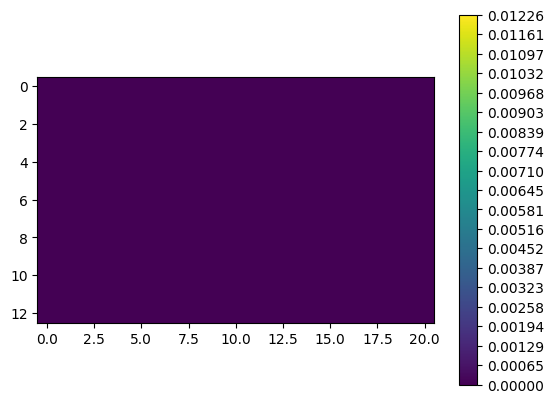

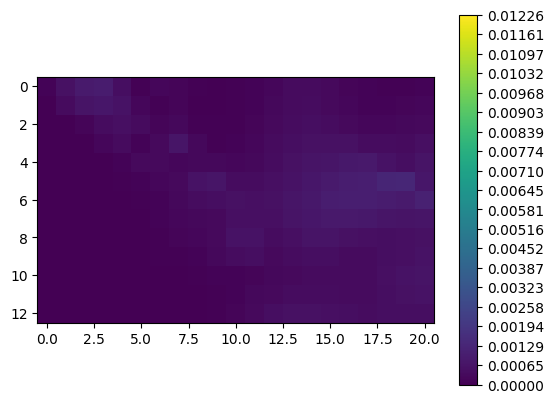

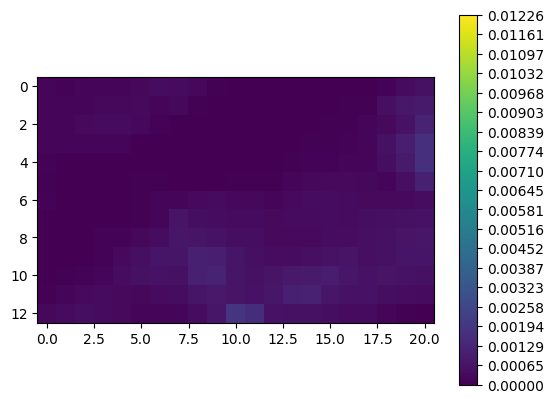

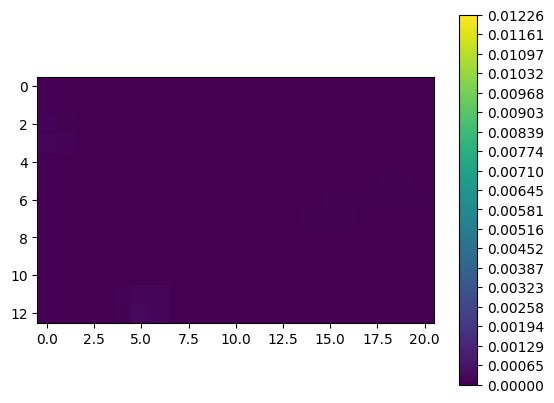

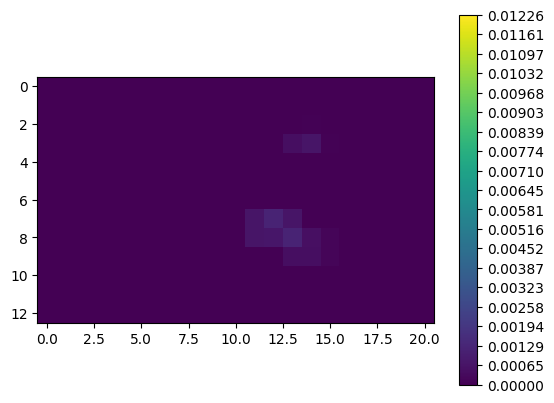

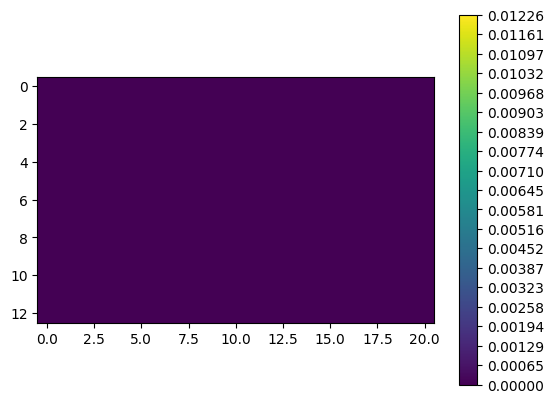

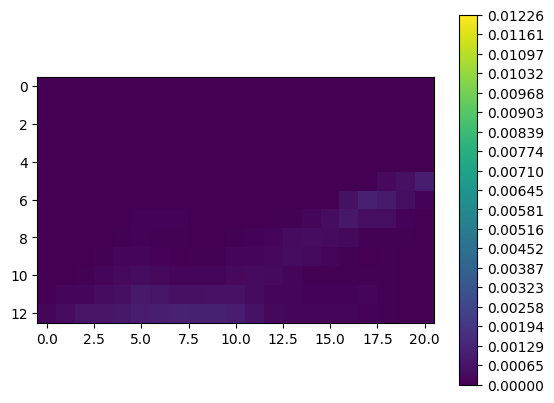

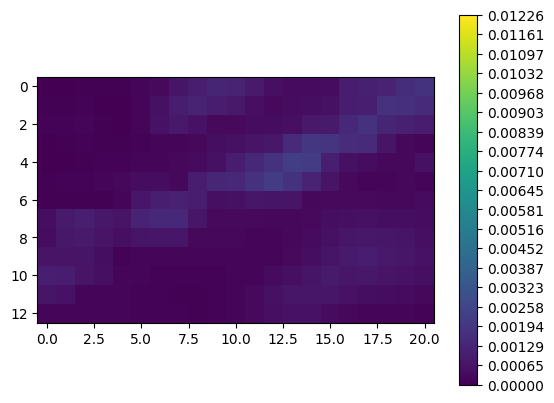

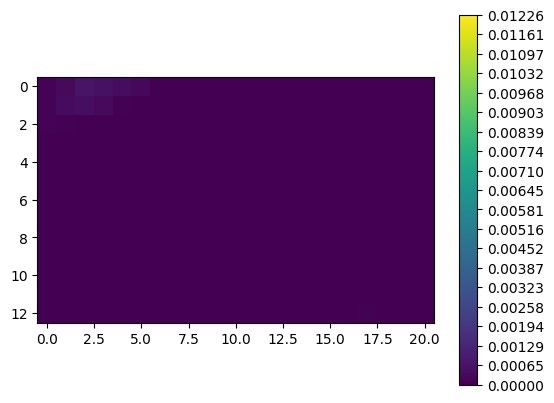

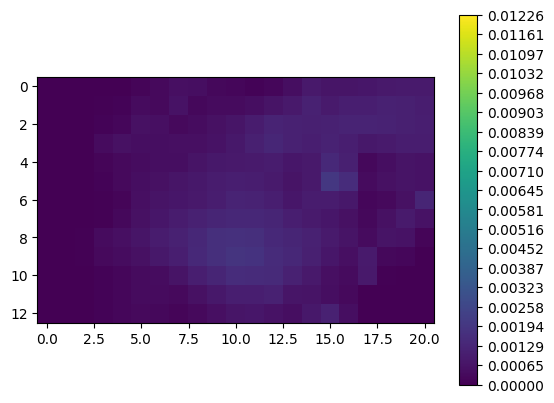

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Find the minimum and maximum values in the dataset
min_val = np.min(dl["tp"])
max_val = np.max(dl["tp"])

# Plot each random sample
for i in range(10):
    rand_num = np.random.randint(0, 8730)
    plt.figure()
    plt.imshow(dl["tp"][rand_num])
    
    # Set the color scale limits based on the min and max values
    plt.colorbar(ticks=np.linspace(min_val, max_val, num=20))
    plt.clim(min_val, max_val)
    
    plt.show()

In [5]:
fn = 'dataset/EMO-5-pd_1990_2019.nc'
ds = nc.Dataset(fn)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    history: Created Tue Dec 21 16:05:52 2021
    Conventions: CF-1.6
    Source_Software: Python netCDF4
    reference: A European daily high-resolution gridded meteorological data set for 1990 - 2019
    title: Lisflood meteo maps 1990-2019 for European setting Apr. 2020
    keywords: Lisflood, Europe
    source: Lisflood Europe meteo maps - pb2015
    institution: European Commission - Disaster Risk Management Unit (JRC.E.1) : https://ec.europa.eu/jrc/en/research-topic/floods
    comment: The timestamp marks the end of the aggregation interval for a given map. e.g.: A daily map with the timestamp of 1990-01-02 06:00 represents the data aggregated from 1990-01-01 06:00:01 to 1990-01-02 06:00:00
    dimensions(sizes): x(1000), y(950), time(10957)
    variables(dimensions): float64 x(x), float64 y(y), float64 time(time), int32 lambert_azimuthal_equal_area(), int16 pd(time, y, x)
    groups: 


In [6]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1000
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 950
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 10957


In [7]:
lat = ds['y'][:]
lat = np.array(lat)
lat = lat/1e5
lat_index = np.argwhere((lat<51.5) & (lat>49)).flatten()
lat_index

array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119])

In [16]:
ds['y'][:]

masked_array(data=[5497500., 5492500., 5487500., 5482500., 5477500.,
                   5472500., 5467500., 5462500., 5457500., 5452500.,
                   5447500., 5442500., 5437500., 5432500., 5427500.,
                   5422500., 5417500., 5412500., 5407500., 5402500.,
                   5397500., 5392500., 5387500., 5382500., 5377500.,
                   5372500., 5367500., 5362500., 5357500., 5352500.,
                   5347500., 5342500., 5337500., 5332500., 5327500.,
                   5322500., 5317500., 5312500., 5307500., 5302500.,
                   5297500., 5292500., 5287500., 5282500., 5277500.,
                   5272500., 5267500., 5262500., 5257500., 5252500.,
                   5247500., 5242500., 5237500., 5232500., 5227500.,
                   5222500., 5217500., 5212500., 5207500., 5202500.,
                   5197500., 5192500., 5187500., 5182500., 5177500.,
                   5172500., 5167500., 5162500., 5157500., 5152500.,
                   5147500., 51425

In [8]:
long = ds['x'][:]
long = np.array(long)
long = long/1e5
long_index = np.argwhere((long>2.5) & (long>6.5)).flatten()
long_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
rain = ds['pd'][0][lat_index]
rain.shape

(50, 1000)

In [43]:
lat = ds['y'][:]
lat = lat/1e5
lat_index = np.argwhere(lat < 51.5)
lat = lat[lat_index]
lat

masked_array(
  data=[[51.475],
        [51.425],
        [51.375],
        [51.325],
        [51.275],
        [51.225],
        [51.175],
        [51.125],
        [51.075],
        [51.025],
        [50.975],
        [50.925],
        [50.875],
        [50.825],
        [50.775],
        [50.725],
        [50.675],
        [50.625],
        [50.575],
        [50.525],
        [50.475],
        [50.425],
        [50.375],
        [50.325],
        [50.275],
        [50.225],
        [50.175],
        [50.125],
        [50.075],
        [50.025],
        [49.975],
        [49.925],
        [49.875],
        [49.825],
        [49.775],
        [49.725],
        [49.675],
        [49.625],
        [49.575],
        [49.525],
        [49.475],
        [49.425],
        [49.375],
        [49.325],
        [49.275],
        [49.225],
        [49.175],
        [49.125],
        [49.075],
        [49.025],
        [9.975],
        [9.925],
        [9.875],
        [9.825],
        [9.775],
 

In [29]:
ds['pd'][1][1]

masked

In [24]:
dl['tp'][1][:]

masked_array(
  data=[[3.36732181e-06, 5.79927645e-06, 7.10879048e-06, 5.23805615e-06,
         8.60537795e-06, 6.73464362e-06, 9.54074512e-06, 1.14114795e-05,
         1.14114795e-05, 3.74146868e-06, 1.49658747e-06, 0.00000000e+00,
         5.61220301e-07, 1.87073434e-06, 4.67683585e-06, 7.67001079e-06,
         1.19726998e-05, 1.53400216e-05, 2.28229589e-05, 2.28229589e-05,
         1.90814902e-05],
        [8.97952482e-06, 1.29080669e-05, 1.19726998e-05, 7.10879048e-06,
         3.74146868e-06, 1.87073434e-06, 5.61220301e-07, 3.36732181e-06,
         1.49658747e-06, 9.35367169e-07, 9.35367169e-07, 9.35367169e-07,
         2.80610151e-06, 5.79927645e-06, 9.54074512e-06, 1.29080669e-05,
         1.14114795e-05, 1.38434341e-05, 1.10373326e-05, 2.24488121e-05,
         2.00168574e-05],
        [2.00168574e-05, 1.72107559e-05, 1.23468466e-05, 6.73464362e-06,
         2.43195464e-06, 6.17342332e-06, 4.30268898e-06, 1.87073434e-06,
         2.43195464e-06, 1.87073434e-06, 2.43195464e-06, 4